In [3]:
#Import required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
#Import datasets
data1=pd.read_csv(r"C:\Users\hp\Downloads\IPL project\IPL project\IPL_Ball_by_Ball_2008_2022.csv")
ball=data1.copy()
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [7]:
data2=pd.read_csv(r"C:\Users\hp\Downloads\IPL project\IPL project\IPL_Matches_2008_2022.csv")
matches=data2.copy()
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [8]:
#Data Cleaning / Data Manipulation

In [9]:
#Manipulating "Season" by replacing years
matches["Season"]=matches["Season"].replace(["2007/08","2009/10","2020/21"],["2008","2010","2020"])

In [10]:
#Find unique teams in dataset
team=pd.concat([matches['Team1'], matches['Team2']])
teams=set(team)

In [11]:
teams

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Gujarat Titans',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Pune Warriors',
 'Punjab Kings',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [12]:
#Since some teams have changed their team names , replaced with only one name
teams_rename={"Delhi Daredevils":"Delhi Capitals",'Rising Pune Supergiants':'Rising Pune Supergiant','Kings XI Punjab':"Punjab Kings","Pune Warriors":"Rising Pune Supergiant"}

In [13]:
matches.replace({"Team1": teams_rename, "Team2": teams_rename,"WinningTeam":teams_rename}, inplace=True)


In [14]:
team1=pd.concat([matches['Team1'], matches['Team2']])
new_teams=set(team1)

In [15]:
new_teams

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Gujarat Titans',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [16]:
#Renaming teams in "ball" dataset.
ball.replace({"BattingTeam": teams_rename}, inplace=True)


In [17]:
#Calculate total_runs of each team in each match based on ID
total_runs = ball.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [18]:
total_runs

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [19]:
#Calculate target for teams that has to be played in "Innings"==2
for ID in total_runs['ID'].unique():
    # Filter DataFrame for innings 1
    inning_1 = total_runs[(total_runs['ID'] == ID) & (total_runs['innings'] == 1)]
    # Calculate target for innings 2
    target_for_innings_2 = inning_1['total_run'].iloc[0] + 1
    # Update target for innings 2 in the DataFrame
    total_runs.loc[(total_runs['ID'] == ID) & (total_runs['innings'] == 2), 'target'] = target_for_innings_2

print(total_runs)

           ID  innings  total_run  target
0      335982        1        222     NaN
1      335982        2         82   223.0
2      335983        1        240     NaN
3      335983        2        207   241.0
4      335984        1        129     NaN
...       ...      ...        ...     ...
1923  1312198        2        193   208.0
1924  1312199        1        157     NaN
1925  1312199        2        161   158.0
1926  1312200        1        130     NaN
1927  1312200        2        133   131.0

[1928 rows x 4 columns]


In [20]:
#Since the Innings==1 doesn't have any target , filled with "0"
total_runs["target"]=total_runs["target"].fillna(0)

In [21]:
total_runs

,ID,innings,total_run,target
0,335982,1,222,0.0
1,335982,2,82,223.0
2,335983,1,240,0.0
3,335983,2,207,241.0
4,335984,1,129,0.0
...,...,...,...,...
1923,1312198,2,193,208.0
1924,1312199,1,157,0.0
1925,1312199,2,161,158.0
1926,1312200,1,130,0.0


In [22]:
#total_runs = total_runs[total_runs['innings']==2]

In [23]:
#total_runs

In [24]:
#Merging datasets "matches" and "total_runs" on "ID"

In [25]:
match_df = matches.merge(total_runs[['ID','total_run','target']],on="ID")

In [26]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130,0.0
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,133,131.0
2,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157,0.0
3,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,161,158.0
4,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,335984,Delhi,2008-04-19,2008,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,132,130.0
1924,335983,Chandigarh,2008-04-19,2008,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240,0.0
1925,335983,Chandigarh,2008-04-19,2008,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,207,241.0
1926,335982,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,222,0.0


In [27]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'total_run', 'target'],
      dtype='object')

In [28]:
#Create a dataframe frame from "match_df" having only required columns.
match_df=match_df[['ID', 'City','Season', 'MatchNumber', 'Team1', 'Team2','WinningTeam','Player_of_Match','Team1Players',
       'Team2Players','total_run', 'target']]

In [29]:
#Merge match_df dataset with ball dataset
match_df2= match_df.merge(ball,on='ID')
match_df2

,ID,City,Season,MatchNumber,Team1,Team2,WinningTeam,Player_of_Match,Team1Players,Team2Players,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459518,335982,Bangalore,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
459519,335982,Bangalore,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
459520,335982,Bangalore,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
459521,335982,Bangalore,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [30]:
#Define a function to add bowling team
def bowling_team(team):
    if team["BattingTeam"]==team["Team1"]:
        return team["Team2"]
    else:
        return team["Team1"]

In [31]:
#Adding column "bowling team" to "match_df2"
match_df2["BowlingTeam"]=match_df2.apply(bowling_team,axis=1)

In [32]:
match_df2

,ID,City,Season,MatchNumber,Team1,Team2,WinningTeam,Player_of_Match,Team1Players,Team2Players,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
2,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
3,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
4,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459518,335982,Bangalore,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
459519,335982,Bangalore,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
459520,335982,Bangalore,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
459521,335982,Bangalore,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [33]:
teams=pd.concat([match_df['Team1'], match_df['Team2']])
n_teams=set(teams)
n_teams

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Gujarat Titans',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [34]:
match_df2.shape

(459523, 29)

In [35]:
#Grouping dataframe by "Season","BattingTeam" to get matches played by each team in each season
teams_df= match_df2.groupby(['Season', 'BattingTeam']).agg({"ID":"nunique"}).reset_index()

In [36]:
teams_df

,Season,BattingTeam,ID
0,2008,Chennai Super Kings,16
1,2008,Deccan Chargers,14
2,2008,Delhi Capitals,14
3,2008,Kolkata Knight Riders,13
4,2008,Mumbai Indians,14
...,...,...,...
121,2022,Mumbai Indians,14
122,2022,Punjab Kings,14
123,2022,Rajasthan Royals,17
124,2022,Royal Challengers Bangalore,16


In [37]:
#Grouping dataframe by "Season","WinningTeam" to get matches won by team in each season
teams_df1= match_df2.groupby(['Season', 'WinningTeam']).agg({"ID":"nunique"}).reset_index()

In [38]:
teams_df1

,Season,WinningTeam,ID
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Capitals,7
3,2008,Kolkata Knight Riders,6
4,2008,Mumbai Indians,7
...,...,...,...
121,2022,Mumbai Indians,4
122,2022,Punjab Kings,7
123,2022,Rajasthan Royals,10
124,2022,Royal Challengers Bangalore,9


In [39]:
#Renaming columns
teams_df1.rename(columns={"WinningTeam":"Team","ID":"Win"},inplace=True)
teams_df.rename(columns={"BattingTeam":"Team","ID":"Matches_Played"},inplace=True)

In [40]:
teams_data=teams_df.merge(teams_df1,on=["Season","Team"])

In [41]:
teams_data

,Season,Team,Matches_Played,Win
0,2008,Chennai Super Kings,16,9
1,2008,Deccan Chargers,14,2
2,2008,Delhi Capitals,14,7
3,2008,Kolkata Knight Riders,13,6
4,2008,Mumbai Indians,14,7
...,...,...,...,...
121,2022,Mumbai Indians,14,4
122,2022,Punjab Kings,14,7
123,2022,Rajasthan Royals,17,10
124,2022,Royal Challengers Bangalore,16,9


In [42]:
#Calculating matches lost
teams_data["Loss"]=teams_data["Matches_Played"]-teams_data["Win"]

In [43]:
teams_data

,Season,Team,Matches_Played,Win,Loss
0,2008,Chennai Super Kings,16,9,7
1,2008,Deccan Chargers,14,2,12
2,2008,Delhi Capitals,14,7,7
3,2008,Kolkata Knight Riders,13,6,7
4,2008,Mumbai Indians,14,7,7
...,...,...,...,...,...
121,2022,Mumbai Indians,14,4,10
122,2022,Punjab Kings,14,7,7
123,2022,Rajasthan Royals,17,10,7
124,2022,Royal Challengers Bangalore,16,9,7


In [44]:
teams_data[teams_data["Team"]=="Chennai Super Kings"].reset_index(drop=True)

,Season,Team,Matches_Played,Win,Loss
0,2008,Chennai Super Kings,16,9,7
1,2009,Chennai Super Kings,14,8,6
2,2010,Chennai Super Kings,16,9,7
3,2011,Chennai Super Kings,16,11,5
4,2012,Chennai Super Kings,18,10,8
5,2013,Chennai Super Kings,18,12,6
6,2014,Chennai Super Kings,16,10,6
7,2015,Chennai Super Kings,17,10,7
8,2018,Chennai Super Kings,16,11,5
9,2019,Chennai Super Kings,17,10,7


In [45]:
#teams_data.to_csv(r"C:\Users\routj\Downloads\IPL project\teams_data.csv")

In [46]:
#Getting Trophy Winners Data
m=match_df2[match_df2["MatchNumber"]=="Final"]
trophy=m.groupby(["Season","WinningTeam"]).agg({"ID":"nunique"}).reset_index()

In [47]:
trophy

,Season,WinningTeam,ID
0,2008,Rajasthan Royals,1
1,2009,Deccan Chargers,1
2,2010,Chennai Super Kings,1
3,2011,Chennai Super Kings,1
4,2012,Kolkata Knight Riders,1
5,2013,Mumbai Indians,1
6,2014,Kolkata Knight Riders,1
7,2015,Mumbai Indians,1
8,2016,Sunrisers Hyderabad,1
9,2017,Mumbai Indians,1


In [48]:
#IPL runner Ups data
runners=match_df2[match_df2["BowlingTeam"]!=match_df2["WinningTeam"]]

In [49]:
r=runners[runners["MatchNumber"]=="Final"]
runner=r.groupby(["Season","BowlingTeam"]).agg({"ID":"nunique"}).reset_index()

In [50]:
runner

,Season,BowlingTeam,ID
0,2008,Chennai Super Kings,1
1,2009,Royal Challengers Bangalore,1
2,2010,Mumbai Indians,1
3,2011,Royal Challengers Bangalore,1
4,2012,Chennai Super Kings,1
5,2013,Chennai Super Kings,1
6,2014,Punjab Kings,1
7,2015,Chennai Super Kings,1
8,2016,Royal Challengers Bangalore,1
9,2017,Rising Pune Supergiant,1


In [51]:
#Final dataset of IPL winners and runners
final_match=trophy.merge(runner,on=["Season"])

In [52]:
final_match.rename(columns={"WinningTeam":"Winner","BowlingTeam":"Runner"},inplace=True)
final_match.drop(columns=["ID_x","ID_y"],inplace=True)

In [53]:
final_match

,Season,Winner,Runner
0,2008,Rajasthan Royals,Chennai Super Kings
1,2009,Deccan Chargers,Royal Challengers Bangalore
2,2010,Chennai Super Kings,Mumbai Indians
3,2011,Chennai Super Kings,Royal Challengers Bangalore
4,2012,Kolkata Knight Riders,Chennai Super Kings
5,2013,Mumbai Indians,Chennai Super Kings
6,2014,Kolkata Knight Riders,Punjab Kings
7,2015,Mumbai Indians,Chennai Super Kings
8,2016,Sunrisers Hyderabad,Royal Challengers Bangalore
9,2017,Mumbai Indians,Rising Pune Supergiant


In [57]:
final_match.to_csv(r"C:\Users\hp\Downloads\IPL project\final_match.csv")


Total_matches_played: 191
Won: 96
Lost: 95
IPL Tropies:  1
IPL Runner Up :  1


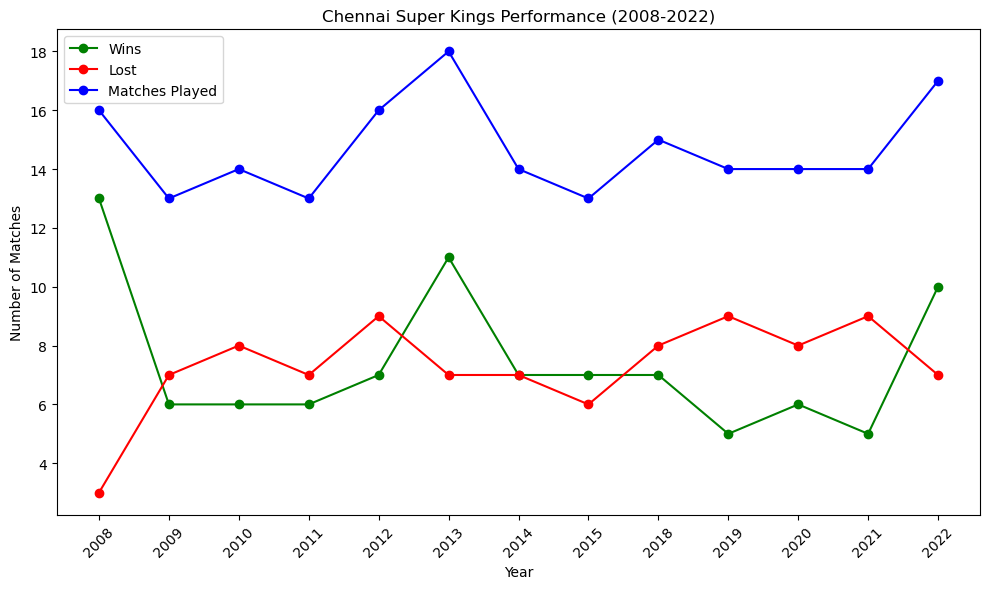

In [58]:
#Data Visualization
team="Rajasthan Royals"
team_data=teams_data[teams_data["Team"]==team]
print("Total_matches_played:",team_data["Matches_Played"].sum())
print("Won:",team_data["Win"].sum())
print("Lost:",team_data["Loss"].sum())
tr=final_match[final_match["Winner"]==team]
print("IPL Tropies: ",len(tr))
ru=final_match[final_match["Runner"]==team]  
print("IPL Runner Up : ",len(ru))      
plt.figure(figsize=(10, 6))
plt.plot(team_data["Season"], team_data["Win"], marker='o', label='Wins', color='green')
plt.plot(team_data["Season"], team_data["Loss"], marker='o', label='Lost', color='red')
plt.plot(team_data["Season"], team_data["Matches_Played"], marker='o', label='Matches Played', color='blue')
plt.title('Chennai Super Kings Performance (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(team_data["Season"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

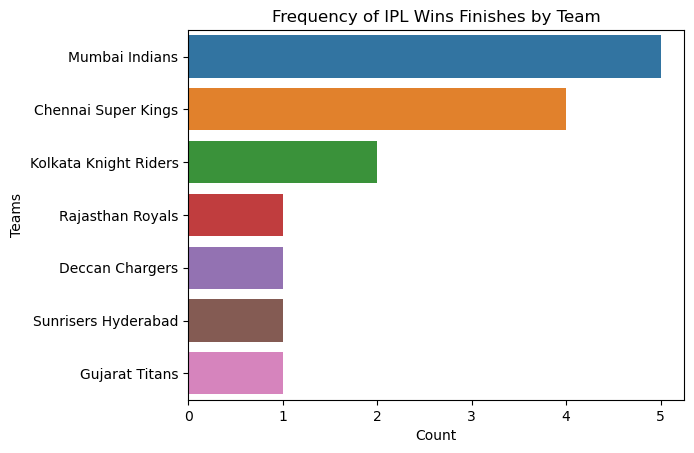

In [59]:
sns.countplot(data=final_match,y="Winner",order=final_match["Winner"].value_counts().index)
plt.title("Frequency of IPL Wins Finishes by Team")
plt.xlabel("Count")
plt.ylabel("Teams")
plt.show()